# 0.0. IMPORTS

In [1]:
import warnings
import datetime
import inflection
import numpy        as np
import pandas       as pd
import seaborn      as sns

from matplotlib             import pyplot as plt
from IPython.display        import Image
from IPython.core.display   import HTML

## 0.1. Helper Functions

## 0.2. Settigns

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## 0.3. Loading Data

In [3]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0. PASSO 01 - DATA DESCRIPTION

In [4]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']


cols_new = list(map(lambda x: inflection.underscore(x), cols_old))

# Renaming columns
df1.columns = cols_new

## 1.2. Data Dimensions

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data Type

In [7]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [8]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [9]:
#competition_distance
df1['competition_distance'].fillna(200000.0, inplace= True)

#competition_open_since_month
df1['competition_open_since_month'] = df1[['date', 'competition_open_since_month']].apply(lambda x: x['date'].month if np.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year
df1['competition_open_since_year'] = df1[['date', 'competition_open_since_year']].apply(lambda x: x['date'].year if np.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#promo2_since_week
df1['promo2_since_week'] = df1[['date', 'promo2_since_week']].apply(lambda x: x['date'].week if np.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#promo2_since_year
df1['promo2_since_year'] = df1[['date', 'promo2_since_year']].apply(lambda x: x['date'].year if np.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df1['promo_interval'].fillna(0, inplace= True)
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis= 1)

In [10]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Type

In [11]:
#competition_open_since_month
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
#competition_open_since_year
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

#promo2_since_week
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
#promo2_since_year
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7. Descriptive Statistics

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [13]:
num_atributes = df1.select_dtypes(include=['int64', 'float64'])
cat_atributes = df1.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'])

### 1.7.1. Numerical Attributes

In [14]:
# Central Tendency - mean, median
ct_mean     = pd.DataFrame( num_atributes.apply(lambda x: np.mean(x)) ).T
ct_median   = pd.DataFrame( num_atributes.apply(lambda x: np.median(x)) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d_std       = pd.DataFrame( num_atributes.apply(lambda x: np.std(x)) ).T
d_min       = pd.DataFrame( num_atributes.apply(lambda x: np.min(x)) ).T
d_max       = pd.DataFrame( num_atributes.apply(lambda x: np.max(x)) ).T
d_range     = pd.DataFrame( num_atributes.apply(lambda x: ( np.max(x)-np.min(x) )) ).T
d_skew      = pd.DataFrame( num_atributes.apply(lambda x: x.skew() )).T
d_kurtosis  = pd.DataFrame( num_atributes.apply(lambda x: x.kurtosis()) ).T

# concatenate
m = pd.concat([d_min, d_max, d_range, ct_mean, ct_median, d_std, d_skew, d_kurtosis]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [15]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2. Categorical Attributes

In [16]:
# Verificação de quantos níveis cada variável categórica possui.
cat_atributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [17]:
df1['state_holiday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

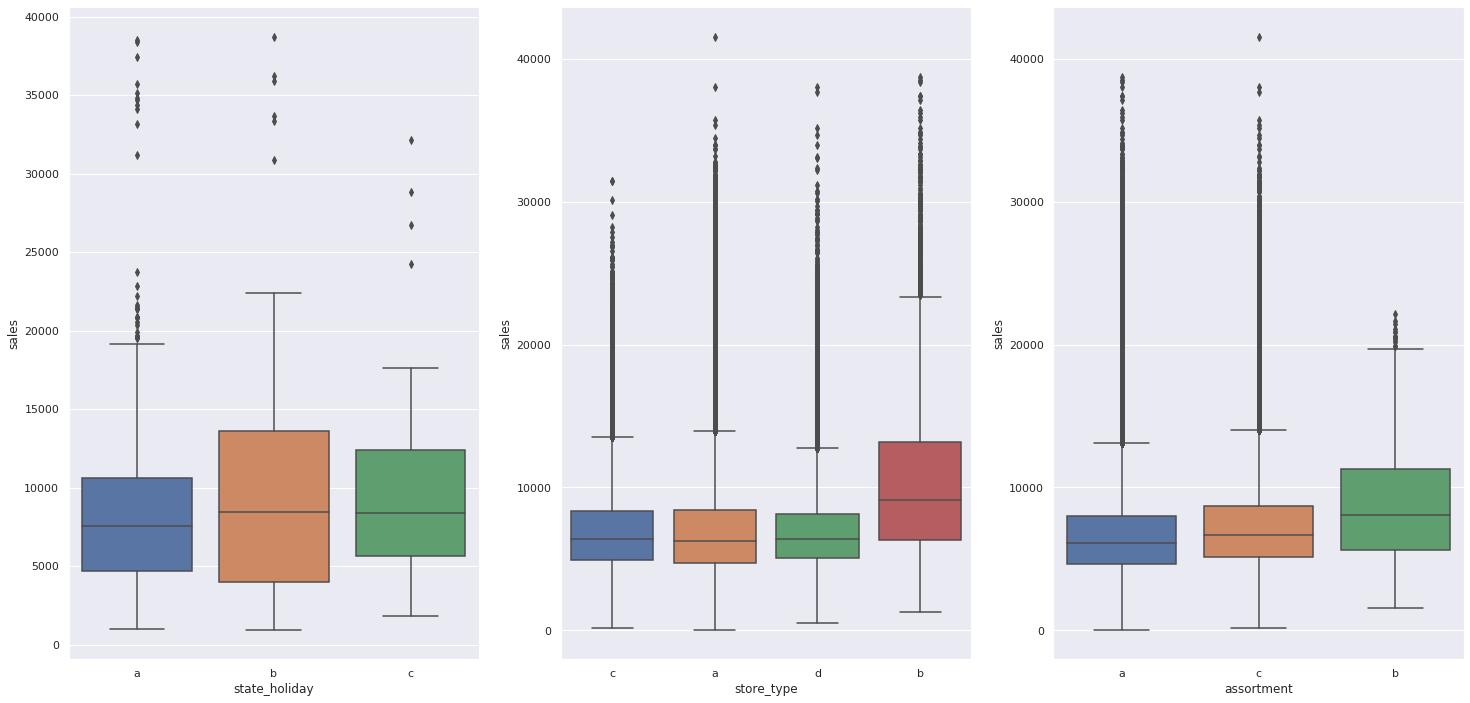

In [18]:
## Visualização da distribuição com boxplot

aux = df1[df1['sales'] > 0] #filtering data

#state_holiday
plt.subplot(1,3,1)
aux1 = aux[aux['state_holiday'] != '0']#removing regular days
sns.boxplot(x='state_holiday', y='sales', data=aux1)

#store_type
plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux)

#assortment
plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux)

# 2.0. PASSO 02 - FEATURE ENGINEERING

In [40]:
df2 = df1.copy()

## 2.1. Mind Map Hypothesis

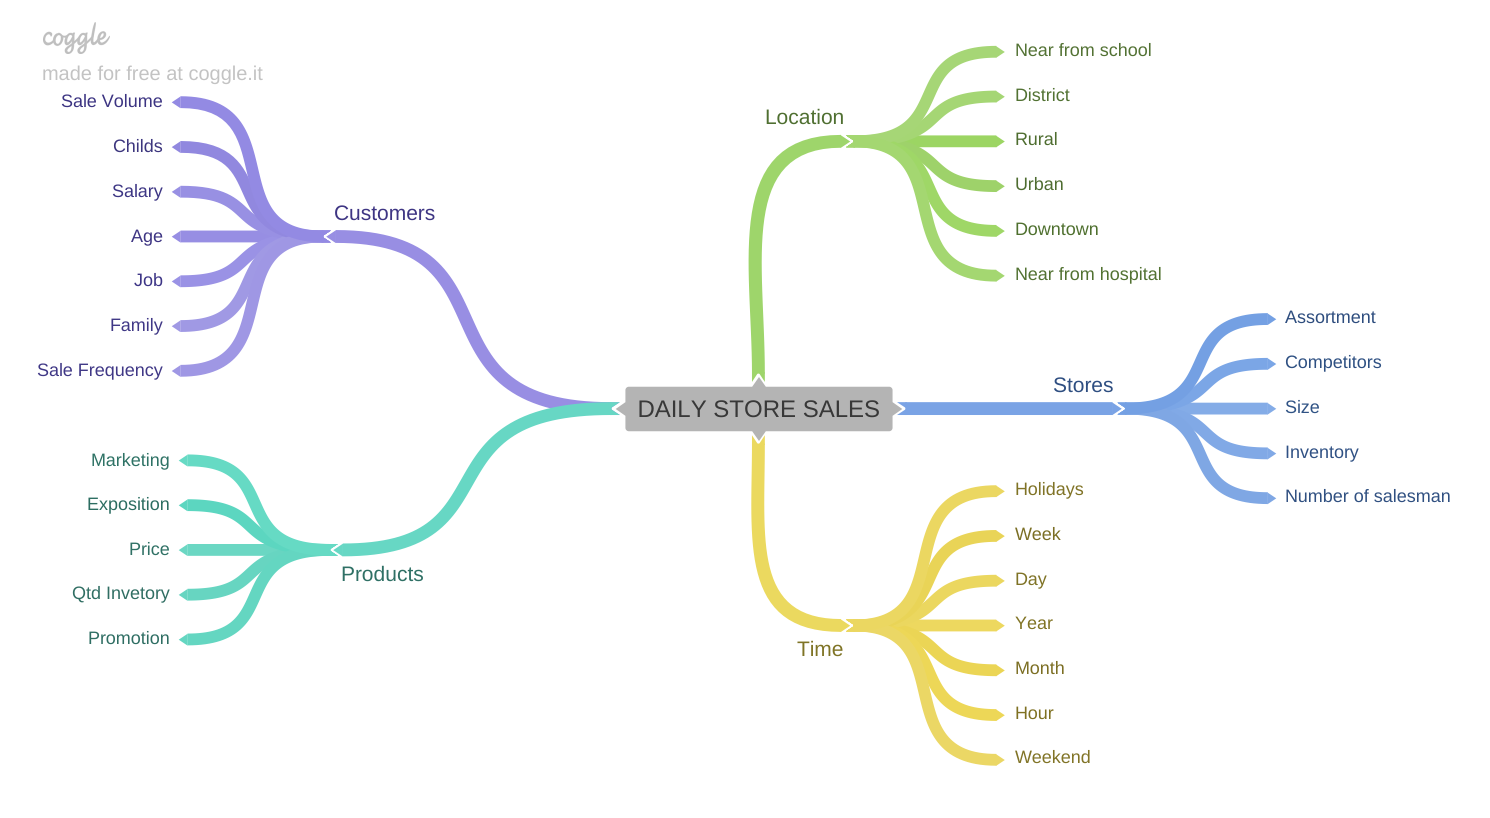

In [20]:
Image('../img/MindMapHypothesis.png')

## 2.2 Hypothesis Creation

### 2.2.1 Store Hypoteshis

 **1.** Lojas com número maior de funcionários deveriam vender mais.
 
 **2.** Lojas com maior capacidade de estoque deveriam vender mais.
 
 **3.** Lojas com maior porte deveriam vender mais.
 
 **4.** Lojas com maior sortimentos deveriam vender mais.
 
 **5.** Lojas com competidores mais próximos deveriam vender menos.
 
 **6.** Lojas com competidores à mais tempo deveriam vendem mais.
 

### 2.2.2 Product Hypoteshis

 **1.** Lojas que investem mais em Marketing deveriam vender mais.
 
 **2.** Lojas com maior exposição de produto deveriam vender mais.
 
 **3.** Lojas com produtos com preço menor deveriam vender mais.
 
 **5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.
 
 **6.** Lojas com promoções ativas por mais tempo deveriam vender mais.
 
 **7.** Lojas com mais dias de promoção deveriam vender mais.
 
 **8.** Lojas com mais promoções consecutivas deveriam vender mais.
 

### 2.2.3 Time Hypoteshis

 **1.** Lojas abertas durante o feriado de Natal deveriam vender mais.
 
 **2.** Lojas deveriam vender mais ao longo dos anos.
 
 **3.** Lojas deveriam vender mais no segundo semestre do ano.
 
 **4.** Lojas deveriam vender mais depois do dia 10 de cada mês.
 
 **5.** Lojas deveriam vender menos aos finais de semana.
 
 **6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Final list of Hypothesis

 **1.** Lojas com maior sortimentos deveriam vender mais.

 **2.** Lojas com competidores mais próximos deveriam vender menos.

 **3.** Lojas com competidores à mais tempo deveriam vendem mais.

 **4.** Lojas com promoções ativas por mais tempo deveriam vender mais.
 
 **5.** Lojas com mais dias de promoção deveriam vender mais.
 
 **6.** Lojas com mais promoções consecutivas deveriam vender mais.

 **7.** Lojas abertas durante o feriado de Natal deveriam vender mais.
 
 **8.** Lojas deveriam vender mais ao longo dos anos.
 
 **9.** Lojas deveriam vender mais no segundo semestre do ano.
 
 **10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
 
 **11.** Lojas deveriam vender menos aos finais de semana.
 
 **12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.4. Feature Engineering

In [41]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2.apply(lambda x: datetime.datetime.strptime( x['promo_since'] + '-1', '%Y-%W-%w' ) - datetime.timedelta(days=7), axis=1 )

# assortment
#a = basic, b = extra, c = extended
df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [42]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
